<a href="https://colab.research.google.com/github/ciao-baby/roy_amato/blob/main/roy_amato_deliverable_1_student_id_u01862158.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Read the data
df = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Prepare X (features) and y (target)
y = df['median_house_value']
X = df.drop('median_house_value', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Print feature coefficients
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef}')

R2 Score: 0.6358044169850408
Mean Squared Error: 4586505886.68125
Root Mean Squared Error: 67723.74684467222
longitude: -44009.94726047099
latitude: -43358.30302850488
housing_median_age: 1147.1166612492661
total_rooms: -7.886313961302221
total_bedrooms: 98.52756370772022
population: -40.504834673702135
households: 61.434943964589365
median_income: 39548.13698894459


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Read the data
df = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Add constant term to the features (statsmodels doesn't add it automatically)
X = df.drop('housing_median_age', axis=1)
X = sm.add_constant(X)
y = df['housing_median_age']

# Create and fit the model
model = sm.OLS(y, X).fit()

# Print summary of the regression
print(model.summary())

# The summary will include:
# - R-squared and Adjusted R-squared
# - F-statistic and Prob (F-statistic)
# - t-statistics and p-values for each coefficient
# - Confidence intervals
# - Various other diagnostic statistics

                            OLS Regression Results                            
Dep. Variable:     housing_median_age   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     111.6
Date:                Sun, 07 Sep 2025   Prob (F-statistic):          1.56e-163
Time:                        16:28:51   Log-Likelihood:                -11455.
No. Observations:                3000   AIC:                         2.293e+04
Df Residuals:                    2991   BIC:                         2.298e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -199.7046     27

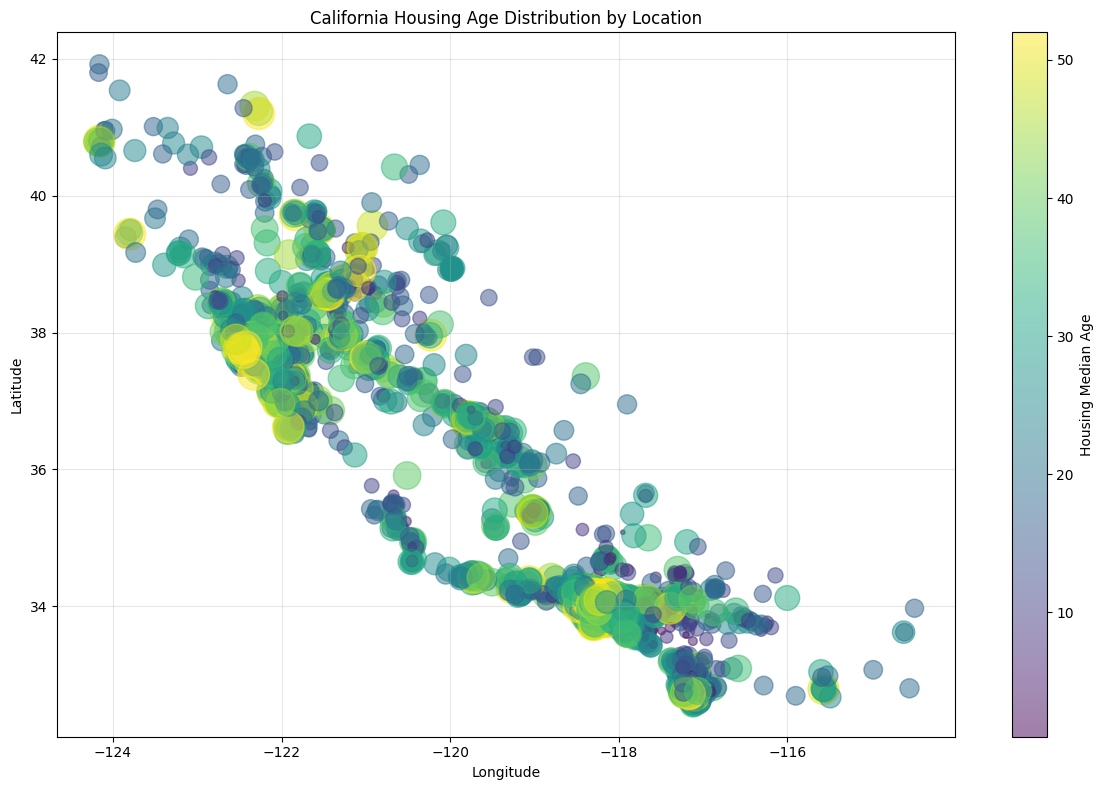

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Create the scatter plot
plt.figure(figsize=(12, 8))

# Create scatter plot with size proportional to housing_median_age
plt.scatter(df['longitude'],
           df['latitude'],
           s=df['housing_median_age']*10,  # Multiply by 10 to make differences more visible
           alpha=0.5,  # Add some transparency
           c=df['housing_median_age'],  # Color based on age
           cmap='viridis')  # Choose colormap

# Add a colorbar
plt.colorbar(label='Housing Median Age')

# Customize the plot
plt.title('California Housing Age Distribution by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()